<a href="https://colab.research.google.com/github/joaohenrique-gracas/machine_learnig-colab/blob/main/Projeto_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Classificação de dados**

In [ ]:
import pandas as pd 

In [ ]:
dados = pd.read_csv('/content/Customer-Churn.csv') 


In [ ]:
dados.shape 
#primeiro valor representa a quantidade de linhas, e o segundo valor representa a quantidade de colunas


(7043, 18)

In [ ]:
dados.head()
# 1= sim, 0= nao

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


Modelagem com variáveis categóricas e numéricas


In [ ]:
#modelagem de maneira manual

traducao_dic = { "Sim" : 1,
                 "Nao" : 0}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [ ]:
#modelagem automatizada com get_dummies
# axis = colunas
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1))


#juntando os dados com a funcao concat
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)
dados_final.head()


,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


In [ ]:
dados_final.shape

(7043, 39)

Defiição formal 

X = dados de entrada (input)
Y = dados de saída (output)

In [ ]:
pd.set_option('display.max_columns', 39)

In [ ]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


Y1 = Churn 

Y1 = F(X1) 

**Verificação para averiguar se a base de dados está desbalanceada**

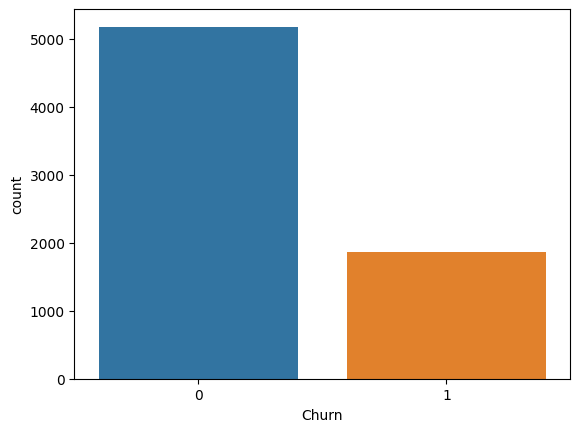

In [ ]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

In [ ]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [ ]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [ ]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


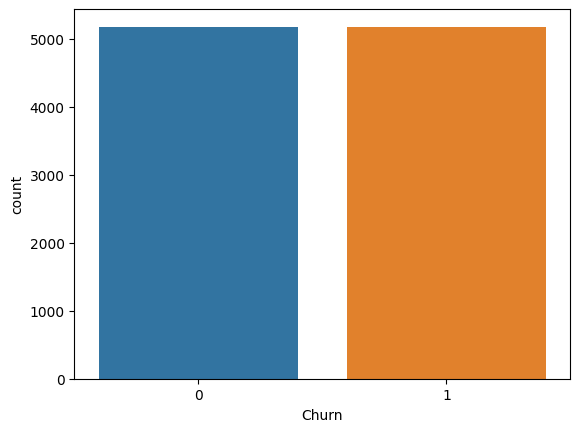

In [ ]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

**2. KNN** 

In [ ]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]
#Vetor de caracteristicas do objeto Maria

In [ ]:
# Primeiro é necessario dividir separa os inputs e outputs
X = dados_final.drop('Churn', axis=1)
Y = dados_final['Churn']

In [ ]:
#Por se tratar de uma métrica de distância é deixar todos os valores na mesma escala
#Importar lib do sklearn para padronizar os dados
from sklearn.preprocessing import StandardScaler

# Coleta cada um dos atributos do nosso conjunto e realiza a seguinte operacao:
# Subtrai a média desse conjunto e faz a divisão pelo desvio padrão.
# Para realizarmos esse calculo nesse conjunto de funções no nosso X precisamos primeiro instanciar essa função.

In [ ]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52771004, -3.06083934, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       ...,
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
        -0.47912706, -0.4360152 ]])

In [ ]:
X_normalizado[0]

#Todas as info do conjunto de dados do cliente 0 

array([ 1.26542767, -0.52771004, -3.06083934,  0.81482091, -0.41318358,
       -1.10771815, -1.3217706 , -0.88447396,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.86827317, -0.44617598,
       -0.51721942, -0.95834643, -0.44617598,  1.57389661,  1.04285807,
       -0.44617598, -0.64211419,  0.87979784, -0.44617598, -0.52426638,
        1.18690873, -0.44617598, -0.77707385,  1.20311799, -0.44617598,
       -0.78976268, -0.44648735,  0.73788726, -0.41989297, -0.42576817,
        1.30373042, -0.47912706, -0.4360152 ])

In [ ]:
#Só é apicado quando o conjunto de dados esta aplicado numa resolucao 2D, linhas e colunas de informacoes
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

#Agora é necessario calcular a distancia de Maria com cliente 0 
#Para isso é necssario utilizarmos uma metrica de distancia

array([[-0.79024667, -0.52771004,  0.32670777,  0.81482091, -0.41318358,
        -1.14938255, -0.97236043,  1.13061554, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.86827317, -0.44617598,
        -0.51721942, -0.95834643, -0.44617598,  1.57389661,  1.04285807,
         2.24126814, -0.64211419, -1.13662476,  2.24126814, -0.52426638,
         1.18690873, -0.44617598, -0.77707385, -0.83117367, -0.44617598,
         1.26620316, -0.44648735, -1.35522058,  2.38155929, -0.42576817,
        -0.76702973, -0.47912706,  2.293498  ]])

**Distancia Eucliadiana:**

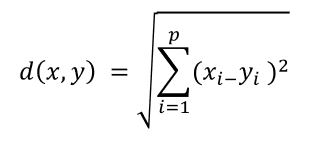

In [ ]:
import numpy as np

In [ ]:
a = Xmaria_normalizado

In [ ]:
b = X_normalizado[0]

In [ ]:
#Comecaremos a aplicar os valores descritos acima na funcao da metrica euclidiana 
a - b

array([[-2.05567434,  0.        ,  3.38754711,  0.        ,  0.        ,
        -0.0416644 ,  0.34941017,  2.0150895 , -3.49991084,  0.        ,
        -2.17376025,  2.00184354,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.68744412,  0.        , -2.01642259,  2.68744412,  0.        ,
         0.        ,  0.        ,  0.        , -2.03429166,  0.        ,
         2.05596584,  0.        , -2.09310784,  2.80145225,  0.        ,
        -2.07076016,  0.        ,  2.72951321]])

In [ ]:
np.square(a - b)

array([[4.22579699e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73592202e-03, 1.22087466e-01, 4.06058568e+00,
        1.22493759e+01, 0.00000000e+00, 4.72523363e+00, 4.00737757e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.22235589e+00, 0.00000000e+00, 4.06596007e+00, 7.22235589e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.13834258e+00, 0.00000000e+00, 4.22699553e+00, 0.00000000e+00,
        4.38110042e+00, 7.84813473e+00, 0.00000000e+00, 4.28804763e+00,
        0.00000000e+00, 7.45024235e+00]])

In [ ]:
np.sum(np.square(a-b))

91.7112036526817

In [ ]:
np.sqrt(91.7112036526817)

9.576596663360199

**2.1 - Importar o sklearn para treinar o algoritmo**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)
#text_size: tamanho do conjunto de teste
#random_state: valor para que essa divisao aleatoria possa ser reproduzida por voce, para garantir a reprodutibilidade dos nossos resultados

**Treino e teste do algoritmo**

In [ ]:
#biblioteca do modelo KNN 
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# instanciar (criar) o modelo - que por padrao, consiste em 5 neighbors 
knn = KNeighborsClassifier(metric='euclidean')

In [ ]:
#treinando o modelo com os dadso do teste
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [ ]:
#testando o modelo com os dados de teste 
predito_knn = knn.predict(X_teste)

In [ ]:
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

**Treino e teste - Modelo Naives Bayes**

In [ ]:
X_treino

array([[-0.79024667, -0.52771004, -3.06083934, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [ 1.26542767,  1.89498006,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       ...,
       [ 1.26542767,  1.89498006,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [ 1.26542767,  1.89498006,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ]])

In [ ]:
y_treino

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [ ]:
#mediana dos dados como valor central
np.median(X_treino)

-0.4461759755508453

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
#valores acima deste valor obtido pela mediana do X_teste é transfromado em 1, e valores abaixo em 0.
bnb = BernoulliNB(binarize= 0.44)

In [ ]:
bnb.fit(X_treino,y_treino)
#a funcao bnb.fit nao compreende valores floats negativos

BernoulliNB(binarize=0.44)

In [ ]:
predito_Bnb = bnb.predict(X_teste)


In [ ]:
predito_Bnb

array([1, 0, 0, ..., 1, 1, 1])

**Modelo Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Instanciando o modelo 
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)
# --> criterio  escolhido foi o entropy
# --> estado de aleatoriedade para reproduzir o resultado

In [ ]:
dtc.fit(X_treino, y_treino)
#modelo treinado 

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
dtc.feature_importances_

array([0.02100894, 0.01395648, 0.0068095 , 0.01986065, 0.01886452,
       0.1627932 , 0.22212421, 0.00939177, 0.00344576, 0.01039829,
       0.0019815 , 0.03128648, 0.00065123, 0.00849934, 0.        ,
       0.01698366, 0.00622973, 0.        , 0.00964718, 0.01267467,
       0.00027769, 0.00770208, 0.01299062, 0.00368329, 0.02047256,
       0.00371587, 0.        , 0.00156955, 0.00671244, 0.0003825 ,
       0.01126638, 0.03622159, 0.16358635, 0.07445054, 0.01758995,
       0.02117825, 0.02183557, 0.01975766])

In [ ]:
predito_ArvoreDecisao = dtc.predict(X_teste)

In [ ]:
predito_ArvoreDecisao 

array([0, 0, 0, ..., 1, 1, 1])

**Validacao dos modelos**

**Matriz de confusão**
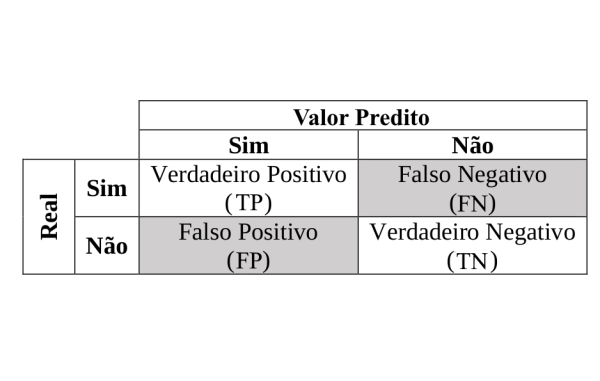

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_teste, predito_knn))

[[1242  327]
 [ 248 1288]]


In [ ]:
print(confusion_matrix(y_teste, predito_Bnb))
#y_teste, primeiro vaor --> valor real, y teste
#predito_knn --> valor predito pelo modelo

[[1084  485]
 [ 238 1298]]


In [ ]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[1250  319]
 [ 275 1261]]


**Acuracia** 

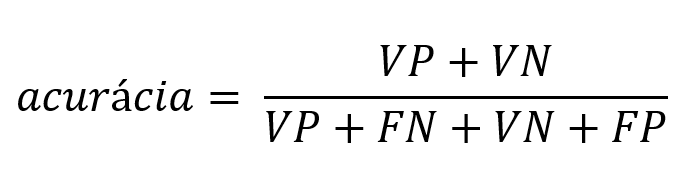

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#KNN
print(accuracy_score(y_teste, predito_knn)*100)

81.48148148148148


In [ ]:
#Bernoulli
print(accuracy_score(y_teste, predito_Bnb)*100)

76.71497584541062


In [ ]:
#Decision Tree
print(accuracy_score(y_teste, predito_ArvoreDecisao)*100) 

80.8695652173913


Precisão dos testes

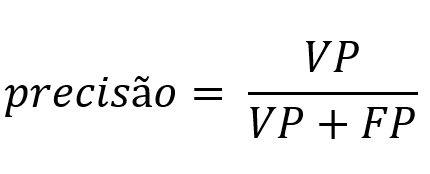

**A métrica de precisão calcula quantos dados foram classificados corretamente como positivos**

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
#KNN
print(precision_score(y_teste, predito_knn)*100)

79.75232198142415


In [ ]:
#Bernoulli 
print(precision_score(y_teste, predito_Bnb)*100)

72.79865395401009


In [ ]:
#DecisionTree
print(precision_score(y_teste, predito_ArvoreDecisao )*100) 

79.81012658227849


# RECALL 

Revocação ou sensibilidade, que calcula o quão bom o modelo é em classificar um resultado positivo (TP). 

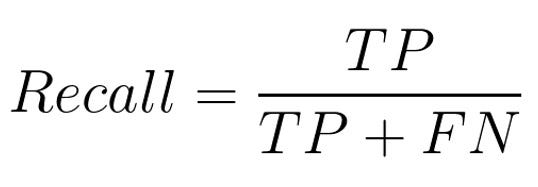

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
#KNN 
print(recall_score(y_teste, predito_knn)*100)

83.85416666666666


In [ ]:
#Bernoulli 
print(recall_score(y_teste, predito_Bnb)*100)

84.50520833333334


In [ ]:
#DecisionTree
print(recall_score(y_teste, predito_ArvoreDecisao)*100)

82.09635416666666
